# Part 3: Analysis

In [36]:
#imports
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [37]:
#read in the CSV files
uniform_testing_output = pd.read_csv("uniform_testing_output.csv")
gaussian_testing_output = pd.read_csv("gaussian_testing_output.csv")

## Analysis for uniformly distributed data points

In [38]:
uniform_vary_k = uniform_testing_output[(uniform_testing_output["N"] == 10000) & (uniform_testing_output["D"] == 2)]
uniform_vary_D = uniform_testing_output[(uniform_testing_output["N"] == 10000) & (uniform_testing_output["k"] == 50)]
uniform_vary_N = uniform_testing_output[(uniform_testing_output["k"] == 50) & (uniform_testing_output["D"] == 2)]

### The effect of varying k

data_structure
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

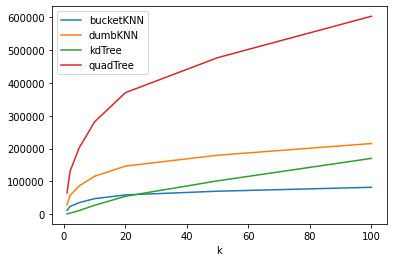

In [39]:
uniform_vary_k.set_index("k").groupby("data_structure")["time"].plot(legend=True)

As we vary K and K grows, we see that all data structures require more time to find the neighbors near the query point. Quad tree is the worst performer in the uniform data case. It seems that most of these data structures take time that grows logorithmically with K. 

### The effect of varying D

data_structure
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

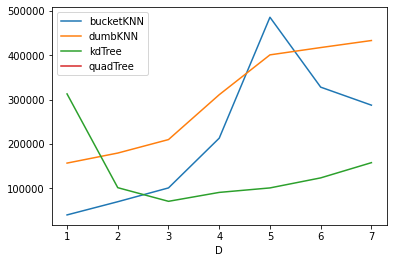

In [40]:
uniform_vary_D.set_index("D").groupby("data_structure")["time"].plot(legend=True)

As we vary D and D grows, we see that all data structures require more time to find the neighbors near the query point, except KD Tree. 

### The effect of varying N

data_structure
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

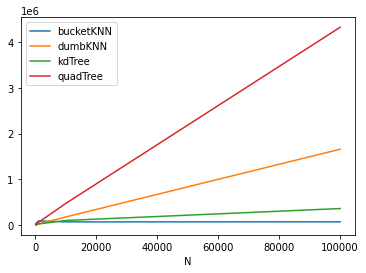

In [41]:
uniform_vary_N.set_index("N").groupby("data_structure")["time"].plot(legend=True)

As we vary N and N grows, we see that all data structures require more time to find the neighbors near the query point. Quad tree is the worst performer in the uniform data case. It seems that most of these data structures take time that grows linearly with N. 

## Analysis for gaussian distributed data points

In [48]:
gaussian_vary_k = gaussian_testing_output[(gaussian_testing_output["N"] == 10000) & (gaussian_testing_output["D"] == 2)]
gaussian_vary_D = gaussian_testing_output[(gaussian_testing_output["N"] == 10000) & (gaussian_testing_output["k"] == 50)]
gaussian_vary_N = gaussian_testing_output[(gaussian_testing_output["k"] == 50) & (gaussian_testing_output["D"] == 2)]

### The effect of varying k

data_structure
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

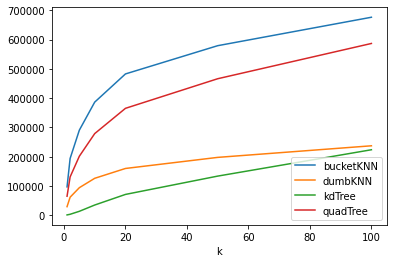

In [43]:
gaussian_vary_k.set_index("k").groupby("data_structure")["time"].plot(legend=True)

As we vary K and K grows, we see that all data structures require more time to find the neighbors near the query point. Bucket KNN is the worst performer in the gaussian case. It seems that most of these data structures take time that grows logorithmically with K. 

### The effect of varying D

data_structure
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

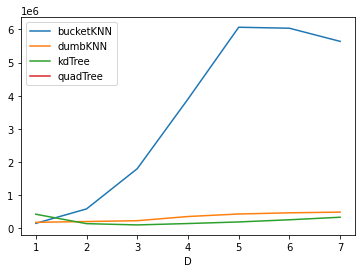

In [44]:
gaussian_vary_D.set_index("D").groupby("data_structure")["time"].plot(legend=True)

As we vary D and D grows, the KD Tree gets a little faster as its partitioning over more dimensions. The Bucket KNN becomes much slower and the dumb KNN performs about the same in all dimensions.  

### The effect of varying N

data_structure
bucketKNN    AxesSubplot(0.125,0.125;0.775x0.755)
dumbKNN      AxesSubplot(0.125,0.125;0.775x0.755)
kdTree       AxesSubplot(0.125,0.125;0.775x0.755)
quadTree     AxesSubplot(0.125,0.125;0.775x0.755)
Name: time, dtype: object

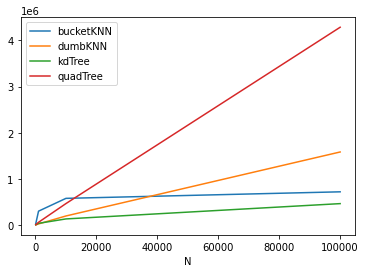

In [49]:
gaussian_vary_N.set_index("N").groupby("data_structure")["time"].plot(legend=True)

As we vary N and N grows, we see that all data structures require more time to find the neighbors near the query point. Quad tree is the worst performer in the uniform data case. It seems that most of these data structures take time that grows linearly with N. 

## Regression  

In [60]:
from sklearn.linear_model import LinearRegression
x = gaussian_testing_output.drop(["time", "data_structure"], axis=1)
y = gaussian_testing_output["time"]
model = LinearRegression().fit(x, y)

print(model.intercept_, model.coef_, model.score(x, y)) # order: D, k, N

-3510357.2182253324 [7.60911410e+05 2.34670040e+04 6.01230337e+01] 0.16805660623367813


We can see that the coefficient for D is the largest and that a one point change in D has the largest predicted outcome in the change in run time. Each one point increase in dimension adds about 760,000 usecs to the run time.

Each 1 point increase in k is assosciated with a 23,000 usec increase in run time.

Each 1 point increase in N is associated with a 60 usec increase run time.

## Are there any aspects of your data that seem unusual? Can you explain them?

It makes sense that when k increases, the run time grows logarithmicallly. We will have already visited nodes on our recusion through the tree that will have had the neighbors we needed. Thus, the penalty for checking additional nodes will be minor.

It also makes sense that the KD tree performs better when there are more dimensions, since we're able to partition the data more effectively over more dimensions.

It wasn't intuitive to me that the algorithm I coded for quadtree KNN grew linearly as the size of the tree grew. I was expecting it might be logarithmic based on the fact that we're using a tree structure. I'm not sure why this is.